## 影响力最大化

在给定的网路中给定初始活跃节点的个数，影响力最大化问题为找到固定个数的活跃节点集，经由特定的传播模型，使得最终活跃节点的数目达到最大。

### 独立级联（IC）模型

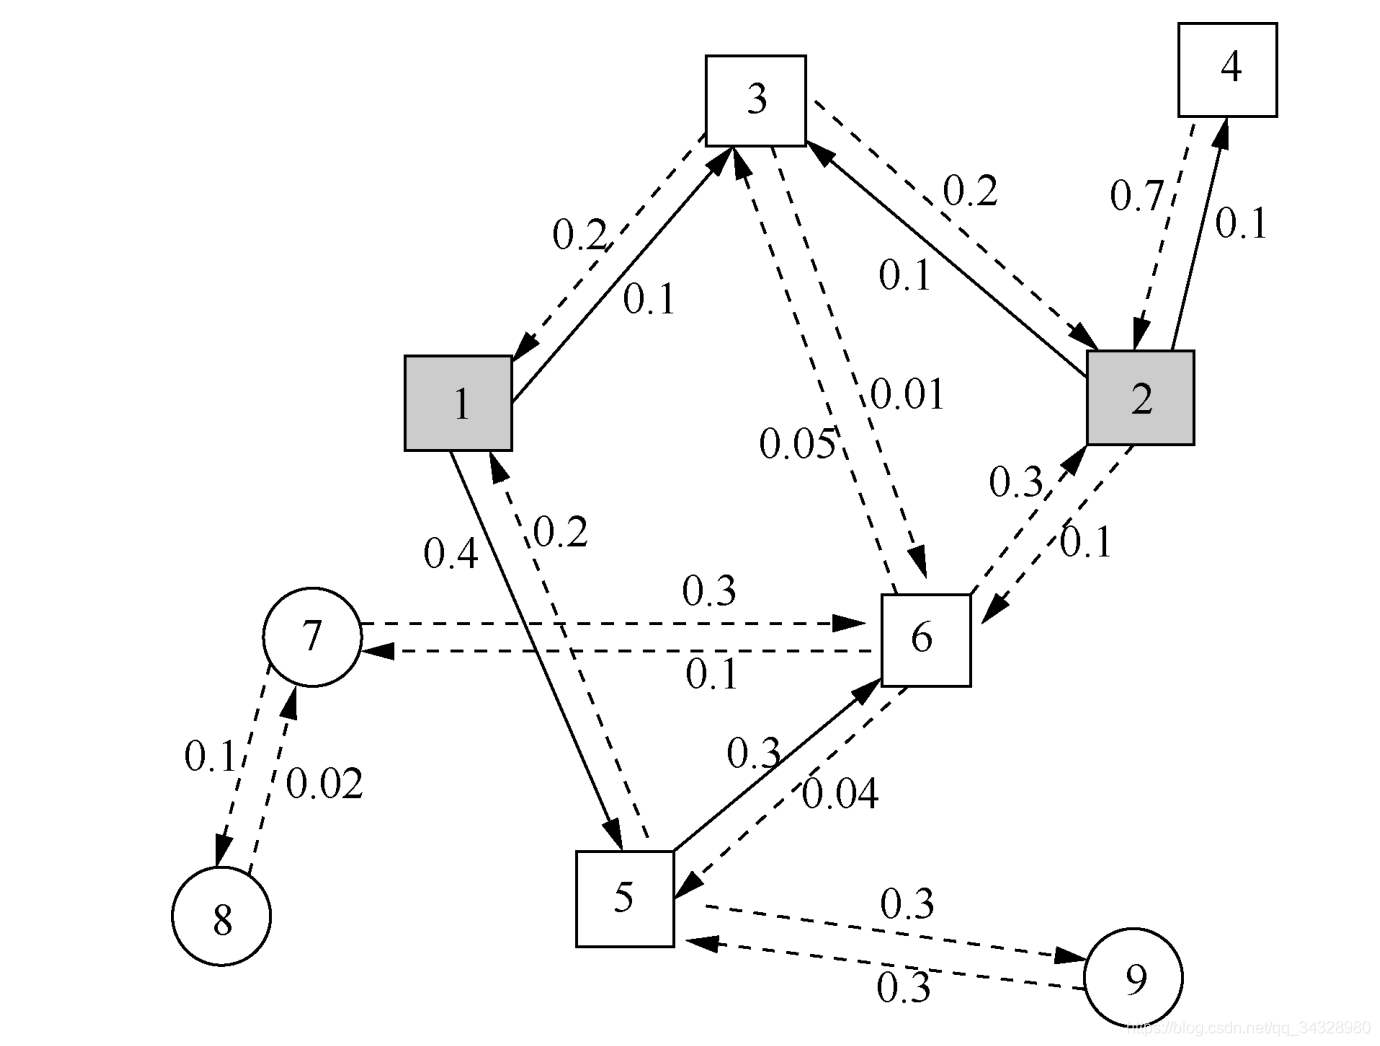

独立级联模型下的影响传播过程为：

- 在t=0时，初始化节点集合$s_0$被激活，其他节点处于不活跃状态
- 对任何$t\leq 1$时刻，用$s_t$在此时被激活。所有在上一时刻被激活的节点$u\in s_{t-1}-s_{t-2}$，u尝试激活每个它的未被激活的近邻$v\in N(u)-s_{t-1}$一次。若激活成功，则$v\in s_t$，若激活失败，且v的其他近邻也未激活v，则v在t时刻仍为不活跃状态。
- 当某一时刻不再由新的节点被激活，传播过程结束。

参考：https://blog.csdn.net/qq_34328980/article/details/107712550 ；https://blog.csdn.net/qq_40742298/article/details/106036213 ； 

### 致谢

感谢这位不知名学长的分享，大大降低了此次作业的完成难度
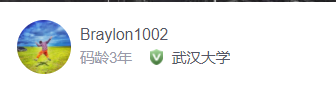

### 邻接矩阵转三元组

因为学长的代码中，图是用邻接矩阵形式保存的，这里先把我们的三元组转化成邻接矩阵

参考：https://blog.csdn.net/qq_39290880/article/details/89078105

In [249]:
# utils.py

import os

def save_results(init_set,method,spread_nums):
    output_path = "ic_results.txt"
    out_str = "{},{},{},{},{},{},{}".format(method,len(init_set),np.mean(spread_nums),np.std(spread_nums),np.max(spread_nums),np.min(spread_nums),np.median(spread_nums))
    os.system("echo {} >> {}".format(out_str,output_path))

In [132]:
# sln1:max degree

def degree(A,n,io="out"):
    if io == "out":
        return np.sum(A,axis=1)[n]
    else:
        return np.sum(A,axis=0)[n]
    
def degree_rank(A):
    D = np.stack([degree(A,n) for n in range(A.shape[0])])
    r = np.argsort(-D)
    return r,D

if __name__ == "__main__":
    r,D = degree_rank(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"DEGREE",sn)

init_num:  1  spread_num:  mean=3.82,std=2.39,max=10.00,min=1.00,mid= 4  S: [175]
init_num:  2  spread_num:  mean=7.45,std=3.84,max=21.00,min=2.00,mid= 7  S: [175 443]
init_num:  3  spread_num:  mean=11.25,std=3.38,max=19.00,min=4.00,mid=11  S: [175 443 558]
init_num:  4  spread_num:  mean=14.41,std=5.11,max=29.00,min=4.00,mid=14  S: [175 443 558 731]
init_num:  5  spread_num:  mean=16.88,std=4.29,max=29.00,min=8.00,mid=16  S: [175 443 558 731 705]
init_num:  6  spread_num:  mean=20.50,std=5.74,max=43.00,min=11.00,mid=20  S: [175 443 558 731 705 244]
init_num:  7  spread_num:  mean=24.77,std=6.25,max=40.00,min=12.00,mid=24  S: [175 443 558 731 705 244 185]
init_num:  8  spread_num:  mean=27.25,std=6.73,max=49.00,min=14.00,mid=26  S: [175 443 558 731 705 244 185 591]
init_num:  9  spread_num:  mean=31.59,std=8.31,max=50.00,min=17.00,mid=30  S: [175 443 558 731 705 244 185 591 247]
init_num:  10  spread_num:  mean=33.87,std=6.94,max=50.00,min=22.00,mid=36  S: [175 443 558 731 705 244 185

### 贪心法

（1）首先|S|=1，在所有点中选一个在IC模型下跑出感染的点数量最多的点加入S
（此时跑了n趟IC）

（2）再在剩下的点中选一个加入S后结果最好的点加入S
（此时跑了n-1趟IC）

（3）重复2，直到能S扩散的结果能覆盖所有点

参考：https://blog.csdn.net/qq_40742298/article/details/104102274

In [143]:
# sln2:DegreeDiscount
import numpy as np

def degree_discount(A,n_top=10):
    r,D = degree_rank(A)
    DD = np.copy(D)
    S = []
    TT = np.zeros(A.shape[0])
    for n in range(n_top):
        for v in r:
            if v not in S:
                S.append(v)
                break
        for v in range(A.shape[0]):
            if A[S[-1],v] != 0 and not (v in S):
                TT[v] += 1
                DD[v] = D[v]-2*TT[v]-(D[v]-TT[v])*TT[v]*A[S[-1],v]
        r = np.argsort(-DD)
    return S

if __name__ == "__main__":
    r = degree_discount(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"DegreeDiscount",sn)

init_num:  1  spread_num:  mean=4.26,std=2.80,max=13.00,min=1.00,mid= 4  S: [175]
init_num:  2  spread_num:  mean=7.31,std=3.25,max=17.00,min=2.00,mid= 7  S: [175, 443]
init_num:  3  spread_num:  mean=10.49,std=4.44,max=25.00,min=3.00,mid=10  S: [175, 443, 558]
init_num:  4  spread_num:  mean=14.22,std=4.51,max=24.00,min=4.00,mid=14  S: [175, 443, 558, 731]
init_num:  5  spread_num:  mean=16.46,std=4.79,max=28.00,min=7.00,mid=16  S: [175, 443, 558, 731, 705]
init_num:  6  spread_num:  mean=20.68,std=6.17,max=39.00,min=11.00,mid=19  S: [175, 443, 558, 731, 705, 244]
init_num:  7  spread_num:  mean=23.57,std=6.46,max=42.00,min=12.00,mid=24  S: [175, 443, 558, 731, 705, 244, 185]
init_num:  8  spread_num:  mean=27.18,std=5.57,max=45.00,min=15.00,mid=26  S: [175, 443, 558, 731, 705, 244, 185, 591]
init_num:  9  spread_num:  mean=30.05,std=6.55,max=51.00,min=16.00,mid=30  S: [175, 443, 558, 731, 705, 244, 185, 591, 247]
init_num:  10  spread_num:  mean=34.22,std=7.57,max=54.00,min=20.00,mid

In [135]:
# sln3:greedy


def greedy2(A,n_top=10):
    init_set = []
    spread_num = 0
    while spread_num != len(A):
        max_spread_num = 0
        for index in range(len(A)):
            if index not in init_set:
                test_S = copy.deepcopy(init_set)
                test_S.append(index)
                spread_num_sum = 0
                for n in range(100):
                    spread_num_sum += ICModel(A, test_S)
                result_spread_num = spread_num_sum/100.0
                if result_spread_num >= max_spread_num:
                    max_spread_num = result_spread_num
                    max_spread_node = index
        spread_num = max_spread_num
        init_set.append(max_spread_node)
        if len(init_set) == n_top:
            break
    return init_set

if __name__ == "__main__":
    r = greedy2(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"GREEDY",sn)

init_num:  1  spread_num:  mean=3.90,std=2.77,max=14.00,min=1.00,mid= 3  S: [731]
init_num:  2  spread_num:  mean=7.05,std=3.44,max=17.00,min=2.00,mid= 7  S: [731, 185]
init_num:  3  spread_num:  mean=11.28,std=5.14,max=30.00,min=4.00,mid=10  S: [731, 185, 175]
init_num:  4  spread_num:  mean=13.93,std=4.86,max=30.00,min=4.00,mid=14  S: [731, 185, 175, 106]
init_num:  5  spread_num:  mean=17.18,std=5.19,max=31.00,min=6.00,mid=17  S: [731, 185, 175, 106, 547]
init_num:  6  spread_num:  mean=20.13,std=6.37,max=43.00,min=9.00,mid=20  S: [731, 185, 175, 106, 547, 469]
init_num:  7  spread_num:  mean=24.06,std=6.31,max=46.00,min=12.00,mid=24  S: [731, 185, 175, 106, 547, 469, 403]
init_num:  8  spread_num:  mean=25.45,std=6.47,max=39.00,min=12.00,mid=25  S: [731, 185, 175, 106, 547, 469, 403, 628]
init_num:  9  spread_num:  mean=29.81,std=6.52,max=46.00,min=12.00,mid=30  S: [731, 185, 175, 106, 547, 469, 403, 628, 651]
init_num:  10  spread_num:  mean=31.68,std=7.47,max=48.00,min=13.00,mid=

### IMRANK

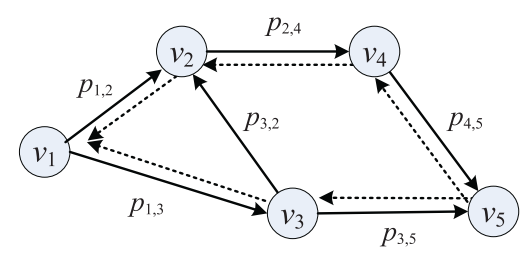

下角标是代表的当前的根据M的排名顺序，这个顺序是在不断地迭代中优化的。实线表示存在传播概率，或者说传播概率不为零。

算法分为两个部分，第一部分是节点影响力排名：

- 为整个图的每一个结点得到一个M（边际影响力）
- 根据边际影响力M大小降序排列得到所有点的排序r
- 不断优化这个排序，排序不能继续被更新

第二部分是影响力的更新，影响力只能在近邻之间，且两个近邻的连接关系是从排名靠前的的节点指向排名靠后的节点。更新方式为：

$$
M_r(v_{r_j})\leftarrow M_r(v_{r_j})+p(v_{r_j},v_{r_i})\times M_r(v_{r_i})\\
M_r(v_{r_i})\leftarrow (1-p(v_{r_j},v_{r_i}))\times M_r(v_{r_i})
$$

这样更新的物理意义可以理解为：

- 影响力大的节点，通过传播扩大影响。
- 影响力小的节点，因为任人摆布降低了自身影响力。

参考：https://blog.csdn.net/qq_40742298/article/details/105395835 ； https://arxiv.org/pdf/1402.3939.pdf

In [144]:
# sln4:IMRank

import numpy as np

def LFA(A,Mr,r):
    n = len(A)
    ii = list(range(2,n))
    ii.reverse()
    for i in ii:
        for j in range(i):
            Mr[r[j]] = Mr[r[j]] + A[r[j],r[i]] * Mr[r[i]]
            Mr[r[i]] = (1 - A[r[j],r[i]]) * Mr[r[i]]
    return Mr

def IMRank(A):
    r0,D = degree_rank(A)
    r = np.copy(r0)
    Mr = [1 for i in range(len(A))]
    t = 0
    while True:
        Mr = LFA(A,Mr,r)
        r = np.argsort(-np.array(Mr))
        dd = np.sum(r0!=r)
        if t%20 == 0:
            print("step %d: delta=%d"%(t,dd))
        if dd == 0:
            print("step %d: delta=%d"%(t,dd))
            break
        t += 1
        r0 = np.copy(r)
    return r

if __name__ == "__main__":
    r = IMRank(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"IMRank",sn)

step 0: delta=747
step 20: delta=295
step 40: delta=133
step 60: delta=69
step 80: delta=50
step 100: delta=19
step 120: delta=32
step 140: delta=16
step 160: delta=22
step 180: delta=6
step 200: delta=19
step 220: delta=8
step 240: delta=2
step 248: delta=0
init_num:  1  spread_num:  mean=3.24,std=2.28,max=13.00,min=1.00,mid= 3  S: [427]
init_num:  2  spread_num:  mean=6.28,std=3.05,max=16.00,min=2.00,mid= 6  S: [427 312]
init_num:  3  spread_num:  mean=10.00,std=4.19,max=25.00,min=3.00,mid=10  S: [427 312 130]
init_num:  4  spread_num:  mean=12.64,std=4.37,max=29.00,min=4.00,mid=12  S: [427 312 130 135]
init_num:  5  spread_num:  mean=16.32,std=5.31,max=39.00,min=8.00,mid=16  S: [427 312 130 135 175]
init_num:  6  spread_num:  mean=21.10,std=5.26,max=34.00,min=12.00,mid=20  S: [427 312 130 135 175 160]
init_num:  7  spread_num:  mean=23.54,std=7.22,max=44.00,min=8.00,mid=22  S: [427 312 130 135 175 160 745]
init_num:  8  spread_num:  mean=27.57,std=6.93,max=47.00,min=8.00,mid=27  S: 

In [146]:
# sln5:Random

def random_choose(A,n_top=10):
    return np.random.choice(A.shape[0],size=n_top)

if __name__ == "__main__":
    r = random_choose(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"RANDOM",sn)

init_num:  1  spread_num:  mean=2.32,std=2.08,max=14.00,min=1.00,mid= 2  S: [647]
init_num:  2  spread_num:  mean=4.45,std=2.38,max=14.00,min=2.00,mid= 4  S: [647  31]
init_num:  3  spread_num:  mean=6.99,std=3.20,max=20.00,min=3.00,mid= 6  S: [647  31 282]
init_num:  4  spread_num:  mean=8.85,std=3.61,max=19.00,min=4.00,mid= 8  S: [647  31 282 444]
init_num:  5  spread_num:  mean=10.85,std=3.82,max=22.00,min=5.00,mid=11  S: [647  31 282 444 491]
init_num:  6  spread_num:  mean=13.51,std=4.24,max=29.00,min=6.00,mid=13  S: [647  31 282 444 491 518]
init_num:  7  spread_num:  mean=16.00,std=4.99,max=32.00,min=7.00,mid=15  S: [647  31 282 444 491 518 307]
init_num:  8  spread_num:  mean=16.85,std=5.04,max=34.00,min=9.00,mid=16  S: [647  31 282 444 491 518 307 346]
init_num:  9  spread_num:  mean=19.47,std=5.08,max=37.00,min=11.00,mid=19  S: [647  31 282 444 491 518 307 346 607]
init_num:  10  spread_num:  mean=21.03,std=5.27,max=40.00,min=12.00,mid=20  S: [647  31 282 444 491 518 307 346 

In [151]:
#sln6 RandomVote

import numpy as np
from collections import Counter


# neighbor_prob
def neighbor_prob(G,n):
    neighbor_prob = [[],[]]
    neighbors = G.neighbors(n)
    for nb in neighbors:
        neighbor_prob[0].append(nb)
        neighbor_prob[1].append(G.get_edge_data(n,nb)['weight'])
    return neighbor_prob[0],np.array(neighbor_prob[1])/np.sum(neighbor_prob[1])

def random_walk(G,n,k=5):
    paths = []
    node_cur = n
    for l in range(k):
        nb,p = neighbor_prob(G,node_cur)
        node_cur = np.random.choice(nb,p=p)
        paths.append(node_cur)
    return paths

def build_corpus(G,N=1000,k=5):
    node_idxs = list(G.nodes)
    begins = np.random.choice(node_idxs,N)
    corpus = np.stack([random_walk(G,n,k=k) for n in begins])
    return corpus

def random_vote(A,N=10000,k=3):
    AT = A.transpose()
    GT = nx.from_numpy_array(AT,create_using=nx.DiGraph())
    cc = build_corpus(GT,N=N,k=k)
    cc = cc.reshape(-1)
    r = np.array(Counter(cc).most_common())
    return r[:,0]

if __name__ == "__main__":
    r = random_vote(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"RandomVote",sn)

init_num:  1  spread_num:  mean=2.71,std=1.72,max=7.00,min=1.00,mid= 2  S: [625]
init_num:  2  spread_num:  mean=5.54,std=2.70,max=18.00,min=2.00,mid= 5  S: [625 451]
init_num:  3  spread_num:  mean=9.10,std=3.47,max=20.00,min=3.00,mid= 8  S: [625 451 175]
init_num:  4  spread_num:  mean=12.59,std=4.26,max=26.00,min=4.00,mid=13  S: [625 451 175 449]
init_num:  5  spread_num:  mean=15.73,std=4.61,max=28.00,min=7.00,mid=16  S: [625 451 175 449 545]
init_num:  6  spread_num:  mean=19.27,std=5.74,max=44.00,min=10.00,mid=19  S: [625 451 175 449 545 427]
init_num:  7  spread_num:  mean=21.19,std=5.64,max=37.00,min=9.00,mid=20  S: [625 451 175 449 545 427 312]
init_num:  8  spread_num:  mean=24.85,std=7.46,max=48.00,min=12.00,mid=24  S: [625 451 175 449 545 427 312 591]
init_num:  9  spread_num:  mean=27.11,std=7.01,max=51.00,min=13.00,mid=27  S: [625 451 175 449 545 427 312 591 475]
init_num:  10  spread_num:  mean=31.13,std=7.07,max=50.00,min=18.00,mid=30  S: [625 451 175 449 545 427 312 59

In [178]:
# sln7:MaxVote

import numpy as np

def gen_As(A,n_top=10):
    As = [A]
    for n in range(n_top-1):
        As.append(np.dot(As[-1],A))
        As[-1] = As[-1] - np.diag(As[-1].diagonal())
    return As

def max_vote(A,n_top=10):
    As = gen_As(A,n_top)
    votes = np.stack([np.argmax(AA,axis=0) for AA in As])
    votes = votes.reshape(-1)
    r = np.array(Counter(votes).most_common())
    return r[:,0]

if __name__ == "__main__":
    r = max_vote(A)
    n_top = 10
    for n in range(1,n_top+1):
        init_set = r[:n]
        sn = runIC(A,init_set)
        save_results(init_set,"MaxVote",sn)

init_num:  1  spread_num:  mean=3.63,std=2.36,max=11.00,min=1.00,mid= 3  S: [433]
init_num:  2  spread_num:  mean=6.19,std=3.43,max=17.00,min=2.00,mid= 5  S: [433 658]
init_num:  3  spread_num:  mean=8.24,std=3.58,max=24.00,min=3.00,mid= 8  S: [433 658 145]
init_num:  4  spread_num:  mean=11.74,std=5.06,max=24.00,min=4.00,mid=11  S: [433 658 145  87]
init_num:  5  spread_num:  mean=13.50,std=4.15,max=27.00,min=5.00,mid=13  S: [433 658 145  87 372]
init_num:  6  spread_num:  mean=16.77,std=4.82,max=30.00,min=7.00,mid=16  S: [433 658 145  87 372 466]
init_num:  7  spread_num:  mean=18.72,std=5.44,max=35.00,min=8.00,mid=18  S: [433 658 145  87 372 466 552]
init_num:  8  spread_num:  mean=22.01,std=6.48,max=39.00,min=9.00,mid=22  S: [433 658 145  87 372 466 552 733]
init_num:  9  spread_num:  mean=23.91,std=5.79,max=42.00,min=13.00,mid=23  S: [433 658 145  87 372 466 552 733 283]
init_num:  10  spread_num:  mean=26.74,std=7.08,max=45.00,min=12.00,mid=26  S: [433 658 145  87 372 466 552 733

In [152]:
# IC.py

import numpy as np
import copy
import random



def ICModel(data, init_set):
    active_set = init_set
    active_status_set = np.zeros(len(data), dtype=int)
    
    for idx in init_set:
        active_status_set[idx-1] = 1
    while active_status_set.sum() < len(data):
        neighbor_set = []
        p_dictionary = {}     
        for d_index in range(len(data)):
            for s_index in range(len(active_set)):
                if data[active_set[s_index], d_index] != 0.0 and active_status_set[d_index] != 1:
                    if d_index not in neighbor_set:
                        neighbor_set.append(d_index)
                        p_dictionary[d_index] = []
                    p_dictionary[d_index].append(data[active_set[s_index], d_index])

        tmp = neighbor_set
        if len(neighbor_set) == 0:
            break
        neighbor_p_set = []
        for index2 in range(len(neighbor_set)):
            p_one = p_dictionary[neighbor_set[index2]]
            p = 1.0
            for i in range(len(p_one)):
                p = p * (1 - p_one[i])
            p = 1 - p
            neighbor_p_set.append(p)

        active_set = []

        for index3 in range(len(neighbor_set)):
            seed = random.random()
            if seed < neighbor_p_set[index3]:
                active_status_set[neighbor_set[index3]] = 1
                active_set.append(neighbor_set[index3])

    return active_status_set.sum()

def runIC(A,init_set):
    spread_nums = []
    for n in range(100):
        spread_num = ICModel(A, init_set)
        spread_nums.append(spread_num)
    print("init_num: ", len(init_set), " spread_num: ", "mean=%.2f,std=%.2f,max=%.2f,min=%.2f,mid=%2.f"%
          (np.mean(spread_nums),np.std(spread_nums),np.max(spread_nums),np.min(spread_nums),np.median(spread_nums)), " S:", init_set)
    return spread_nums

[论文笔记](https://blog.csdn.net/zm714981790/article/details/49964137); [图可视化](https://blog.csdn.net/caoyuan666/article/details/105754152)

In [117]:
# main.py

import scipy.sparse as sp
import networkx as nx

edgelist = np.loadtxt("./DUNF_with_Weights.txt")
N = 750
A = sp.coo_matrix((edgelist[:,2].tolist(),(np.int32(edgelist[:,0]-1).tolist(),np.int32(edgelist[:,1]-1).tolist())),shape=(N,N)).toarray()
G = nx.from_numpy_array(A,create_using=nx.DiGraph())

In [1]:
# plot.py
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd


def draw_net(G):
    plt.figure(figsize=(30,20))
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color='r', edgelist=edges, edge_color="b",width=weights,with_labels=True,node_size=10,arrow_size=12)
    plt.savefig("inf_net.png",dpi=300)
    plt.show()
    
def plot_results():
    results = pd.read_csv("ic_results.txt",sep=",",header=None)
    results = results.to_numpy()
    methods = np.unique(results[:,0])
    results = results.reshape((len(methods),-1,7))
    fmt = ['o','^','*','s','x','p','d']
    for res in results:
        plt.plot(res[:,1],res[:,2],"-"+fmt.pop(),label=res[0,0])
    plt.legend()
    plt.xlabel("seed set size")
    plt.ylabel("influence spread")
    plt.ylim(0,40)
    plt.xlim(1,10)
    plt.savefig("reuslts.png",dpi=300)
    plt.show()